# **Análise de Sentimentos e Categorização de Textos com Machine Learning**
## **Introdução**
Este projeto tem como objetivo desenvolver uma aplicação baseada em **Machine Learning (ML)** e **Processamento de Linguagem Natural (NLP)** para realizar **análise de sentimentos** e **categorização de textos**. A aplicação utiliza o conjunto de dados **Drug Reviews Dataset** disponibilizado pelo site [Drugs.com](https://www.drugs.com) e armazenado no repositório da [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/462/drug+review+dataset+drugs+com).

## **Motivação**
A análise de sentimentos em textos escritos por pacientes pode fornecer insights valiosos sobre a eficácia de medicamentos, possíveis efeitos colaterais e o nível geral de satisfação. Além disso, a categorização de textos permite organizar e prever informações úteis, como condições médicas tratadas. Esses processos são especialmente relevantes em áreas como saúde e bioinformática, onde decisões baseadas em dados podem melhorar a qualidade de vida.

Neste projeto, utilizaremos:
- **Técnicas de Machine Learning** para construir modelos preditivos.
- **Ferramentas de NLP** para pré-processamento e análise textual.
- **Visualizações e métricas de desempenho** para avaliar os resultados obtidos.

## **Sobre o Dataset**
O **Drug Reviews Dataset** foi coletado a partir de avaliações de medicamentos feitas por pacientes. O dataset contém informações como:
1. **`drugName`**: Nome do medicamento.
2. **`condition`**: Condição médica tratada.
3. **`review`**: Texto da avaliação do paciente.
4. **`rating`**: Classificação de satisfação (1 a 10 estrelas).
5. **`date`**: Data da avaliação.
6. **`usefulCount`**: Número de usuários que consideraram a avaliação útil.

Os dados estão divididos em dois conjuntos:
- **Treinamento**: `drugsComTrain_raw.tsv` (75% dos dados).
- **Teste**: `drugsComTest_raw.tsv` (25% dos dados).

## **Objetivos**
1. **Análise de Sentimentos**:
   - Classificar as avaliações em **positivas**, **neutras** ou **negativas**, utilizando a coluna `rating`.
2. **Categorização de Textos**:
   - Identificar a **condição médica** (`condition`) associada a cada avaliação com base no texto fornecido.

Este projeto será desenvolvido no **Google Colab**, utilizando bibliotecas populares de Python para processamento de dados, aprendizado de máquina e visualização.

---

Vamos começar com a análise dos dados!



In [ ]:
pip install ucimlrepo;

In [ ]:
from ucimlrepo import fetch_ucirepo
import pandas as pd

# Metadados do dataset
# print("Metadados do dataset:")
# print(drug_reviews_drugs_com.metadata)

# Informações sobre as variáveis
# print("\nInformações sobre as variáveis:")
# print(drug_reviews_drugs_com.variables)

# Fetch dataset
drug_reviews_drugs_com = fetch_ucirepo(id=462)

# Dados principais
X = drug_reviews_drugs_com.data.features
y = drug_reviews_drugs_com.data.targets

# Transformar em DataFrame para facilitar a manipulação
data = pd.concat([X, y], axis=1)

# Exibir as primeiras linhas
print("Primeiras linhas do dataset:")
# print(data.head())
data.head(10)


Primeiras linhas do dataset:


,drugName,condition,review,rating,date,usefulCount
0,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37
5,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,28-Nov-15,43
6,Levonorgestrel,Emergency Contraception,"""He pulled out, but he cummed a bit in me. I t...",1,7-Mar-17,5
7,Aripiprazole,Bipolar Disorde,"""Abilify changed my life. There is hope. I was...",10,14-Mar-15,32
8,Keppra,Epilepsy,""" I Ve had nothing but problems with the Kepp...",1,9-Aug-16,11
9,Ethinyl estradiol / levonorgestrel,Birth Control,"""I had been on the pill for many years. When m...",8,8-Dec-16,1


# **Exploração de Dados (EDA)**

## **Por que realizar o EDA?**

A Análise Exploratória de Dados (EDA - Exploratory Data Analysis) é uma etapa essencial no desenvolvimento de qualquer projeto de Machine Learning. O principal objetivo é entender melhor o dataset, identificar padrões e tendências, e encontrar possíveis irregularidades ou outliers que podem impactar os modelos.

Além disso, o EDA nos ajuda a:
- Explorar as variáveis individualmente e em conjunto.
- Verificar relações entre variáveis (ex.: texto, classificações, contagens úteis).
- Compreender a estrutura dos dados e alinhar as estratégias de pré-processamento e modelagem.

---

## **Abordagem para o EDA**

1. **Entendimento das Variáveis**:
   - Explorar as colunas do dataset (`drugName`, `condition`, `review`, etc.) para encontrar padrões ou insights relevantes.
   
2. **Identificar Tendências e Distribuições**:
   - Visualizar a distribuição de variáveis numéricas, como `rating` e `usefulCount`.
   - Analisar a frequência de valores categóricos, como os medicamentos e condições.

3. **Descobrir Relações Entre Variáveis**:
   - Verificar se há correlações ou dependências entre os dados que possam ser aproveitadas pelos modelos.

4. **Preparar para Modelagem**:
   - Usar os insights encontrados para orientar a construção e treinamento dos modelos preditivos.

---

Após realizar o EDA, passaremos para o pré-processamento dos dados e a construção de nossos modelos. Vamos começar!


In [ ]:
# Verificar dimensões
print(f"Dimensões do dataset: {data.shape}")
print()

# Verificar tipos de dados
print("Tipos de dados em cada coluna:")
print(data.dtypes)
print()

# Verificar valores ausentes
print("Dados ausentes por coluna:")
print(data.isnull().sum())
print()

# Valores únicos em colunas categóricas
print("Número de medicamentos únicos:", data['drugName'].nunique())
print("Número de condições únicas:", data['condition'].nunique())
print()

# Estatísticas descritivas para colunas numéricas
print("Estatísticas descritivas:")
print(data.describe())
print()

# Estatísticas descritivas completas
print("Estatísticas descritivas para todas as colunas:")
print(data.describe(include='all'))
print()

# Porcentagem de valores ausentes
missing_percentage = data.isnull().sum() / len(data) * 100
print("Porcentagem de valores ausentes por coluna:")
print(missing_percentage)
print()

# Top 20 condições mais frequentes
print("Top 20 condições mais frequentes:")
print(data['condition'].value_counts().head(20))
print()

# Top 20 medicamentos mais avaliados
print("Top 20 medicamentos mais avaliados:")
print(data['drugName'].value_counts().head(20))
print()



Dimensões do dataset: (215063, 6)

Tipos de dados em cada coluna:
drugName       object
condition      object
review         object
rating          int64
date           object
usefulCount     int64
dtype: object

Dados ausentes por coluna:
drugName          0
condition      1194
review            0
rating            0
date              0
usefulCount       0
dtype: int64

Número de medicamentos únicos: 3671
Número de condições únicas: 916

Estatísticas descritivas:
              rating    usefulCount
count  215063.000000  215063.000000
mean        6.990008      28.001004
std         3.275554      36.346069
min         1.000000       0.000000
25%         5.000000       6.000000
50%         8.000000      16.000000
75%        10.000000      36.000000
max        10.000000    1291.000000

Estatísticas descritivas para todas as colunas:
              drugName      condition  review         rating      date  \
count           215063         213869  215063  215063.000000    215063   
unique    

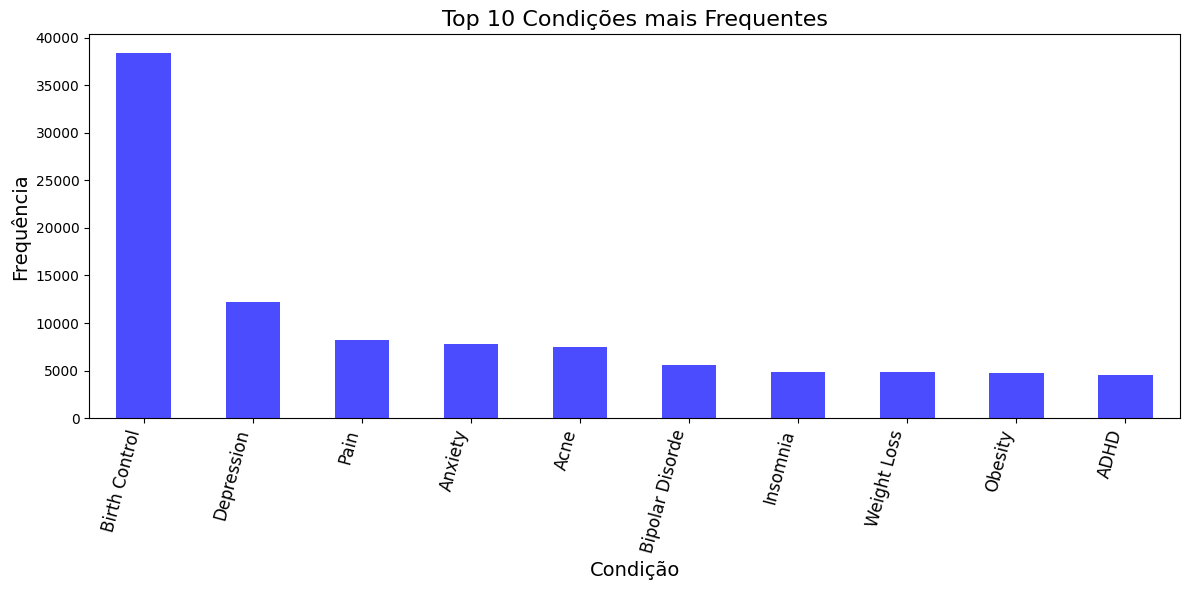

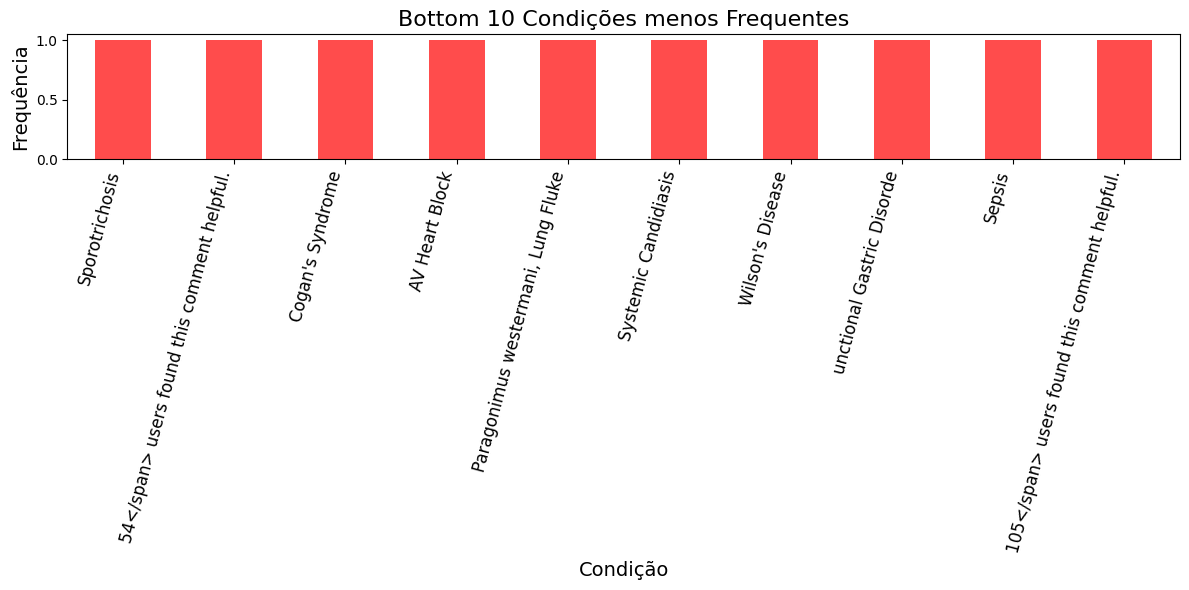

In [ ]:
import matplotlib.pyplot as plt

# Top 20 condições
top_conditions = data['condition'].value_counts().head(10)
bottom_conditions = data['condition'].value_counts().tail(10)

# Gráfico para top 10 condições
plt.figure(figsize=(12, 6))
top_conditions.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Top 10 Condições mais Frequentes', fontsize=16)
plt.xlabel('Condição', fontsize=14)
plt.ylabel('Frequência', fontsize=14)
plt.xticks(rotation=75, fontsize=12, ha='right')  # Ajuste a rotação e alinhamento
plt.tight_layout()  # Garante que o gráfico não corte informações
plt.show()

print()

# Gráfico para bottom 10 condições
plt.figure(figsize=(12, 6))
bottom_conditions.plot(kind='bar', color='red', alpha=0.7)
plt.title('Bottom 10 Condições menos Frequentes', fontsize=16)
plt.xlabel('Condição', fontsize=14)
plt.ylabel('Frequência', fontsize=14)
plt.xticks(rotation=75, fontsize=12, ha='right')  # Ajuste a rotação e alinhamento
plt.tight_layout()  # Garante que o gráfico não corte informações
plt.show()


Distribuição de Ratings (em %):
rating
10    31.620967
9     17.068487
1     13.446292
8     11.645890
7      5.834104
5      4.985981
2      4.308040
3      4.053696
6      3.934661
4      3.101882
Name: proportion, dtype: float64


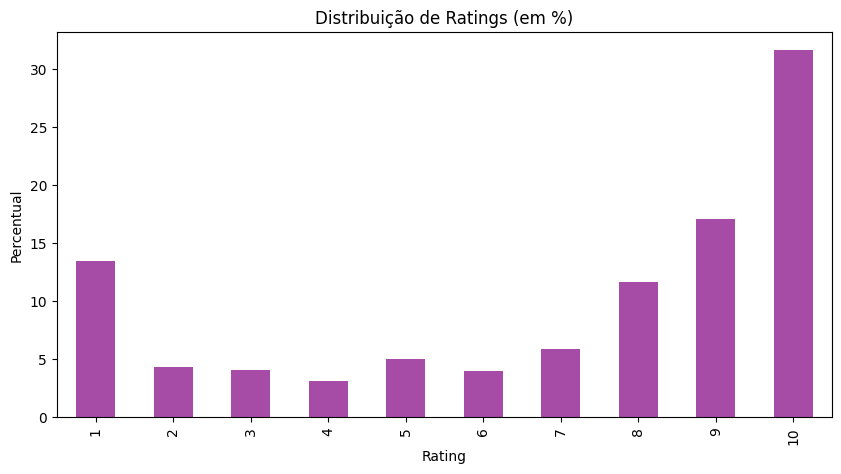

In [ ]:
# Distribuição de ratings com porcentagem
rating_distribution = data['rating'].value_counts(normalize=True) * 100
print("Distribuição de Ratings (em %):")
print(rating_distribution)

# Gráfico da distribuição
plt.figure(figsize=(10, 5))
rating_distribution.sort_index().plot(kind='bar', color='purple', alpha=0.7)
plt.title('Distribuição de Ratings (em %)')
plt.xlabel('Rating')
plt.ylabel('Percentual')
plt.show()


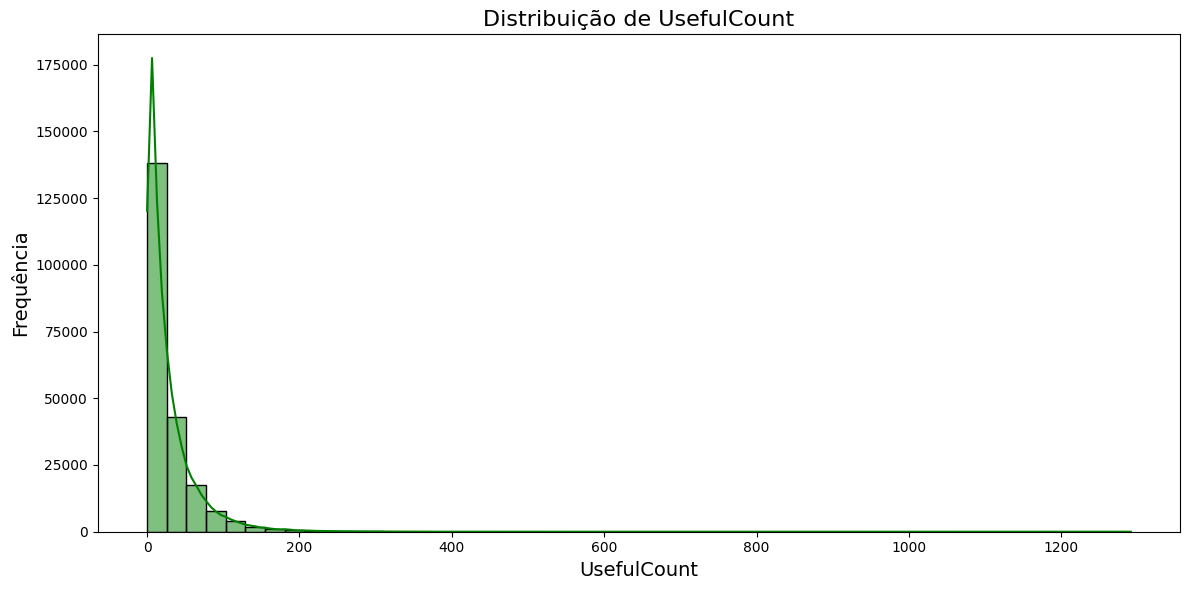

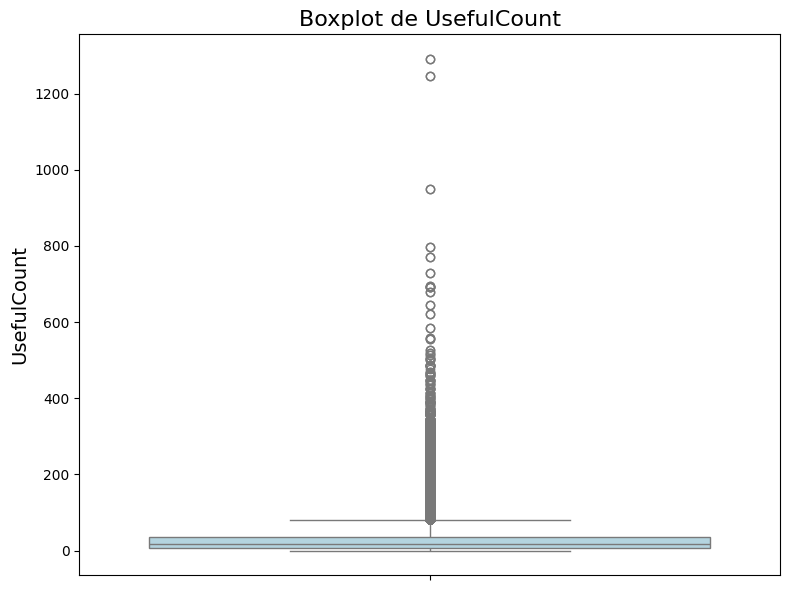

In [ ]:
import seaborn as sns

# Histograma de usefulCount
plt.figure(figsize=(12, 6))
sns.histplot(data['usefulCount'], bins=50, kde=True, color='green')
plt.title('Distribuição de UsefulCount', fontsize=16)
plt.xlabel('UsefulCount', fontsize=14)
plt.ylabel('Frequência', fontsize=14)
plt.tight_layout()
plt.show()


print()

# Boxplot de usefulCount
plt.figure(figsize=(8, 6))
sns.boxplot(y=data['usefulCount'], color='lightblue')
plt.title('Boxplot de UsefulCount', fontsize=16)
plt.ylabel('UsefulCount', fontsize=14)
plt.tight_layout()
plt.show()


Número de medicamentos por condição (Top 20):
condition
Not Listed / Othe                             253
Pain                                          219
Birth Control                                 181
High Blood Pressure                           146
Acne                                          127
Depression                                    115
Rheumatoid Arthritis                          107
Diabetes, Type 2                               97
Allergic Rhinitis                              95
Insomnia                                       85
Osteoarthritis                                 84
Bipolar Disorde                                82
Anxiety                                        81
Abnormal Uterine Bleeding                      77
Endometriosis                                  64
3</span> users found this comment helpful.     62
Psoriasis                                      61
Migraine                                       60
ADHD                                        

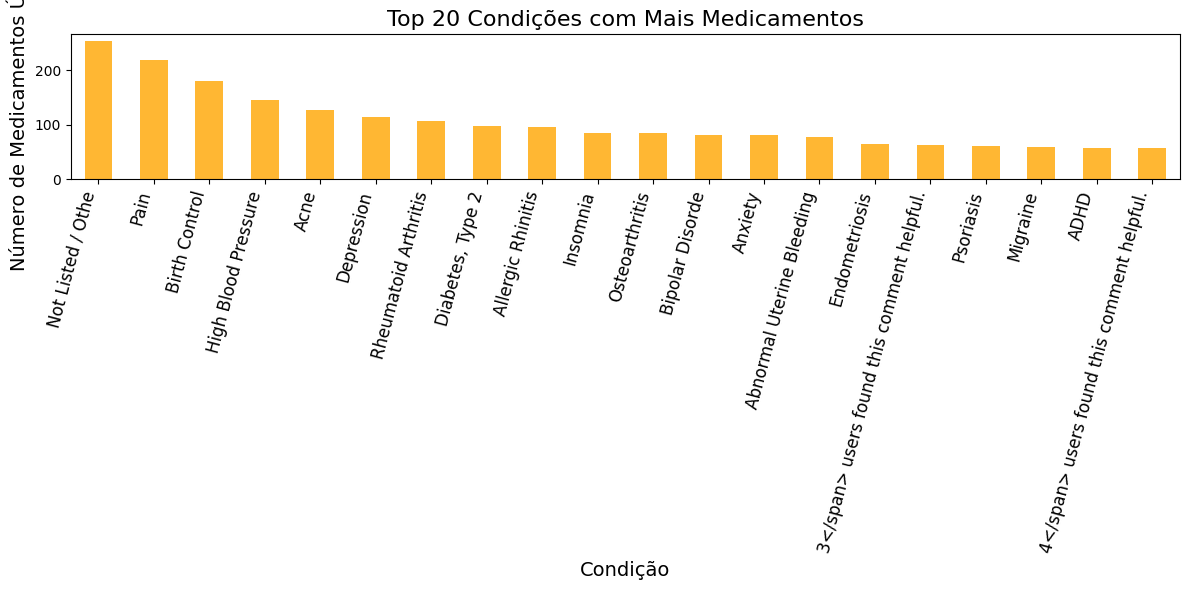

In [ ]:
# Número de medicamentos por condição
drugs_per_condition = data.groupby('condition')['drugName'].nunique().sort_values(ascending=False)
print("Número de medicamentos por condição (Top 20):")
print(drugs_per_condition.head(20))

# Plotando as 20 principais condições com mais medicamentos
plt.figure(figsize=(12, 6))
drugs_per_condition.head(20).plot(kind='bar', color='orange', alpha=0.8)
plt.title('Top 20 Condições com Mais Medicamentos', fontsize=16)
plt.xlabel('Condição', fontsize=14)
plt.ylabel('Número de Medicamentos Únicos', fontsize=14)
plt.xticks(rotation=75, fontsize=12, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
# Verificar revisões com '</span>'
span_data = data[data['condition'].str.contains('</span>', case=False, regex=True, na=False)]
print(f"Número de linhas com '</span>' nos dados: {len(span_data)}")

# Percentual de dados com '</span>'
percent_noisy = 100 * len(span_data) / len(data)
print(f"Percentual de dados com ruído: {percent_noisy:.2f}%")

# Remover linhas com '</span>'
data_cleaned = data.drop(span_data.index, axis=0)
print(f"Dimensões após remoção de ruído: {data_cleaned.shape}")


Número de linhas com '</span>' nos dados: 1171
Percentual de dados com ruído: 0.54%
Dimensões após remoção de ruído: (213892, 6)


In [ ]:
# Verificar condições 'not listed / other'
not_listed = data_cleaned[data_cleaned['condition'] == 'Not Listed / Othe']
print(f"Número de linhas com 'not listed / other': {len(not_listed)}")

# Percentual de dados com 'not listed / other'
percent_not_listed = 100 * len(not_listed) / len(data_cleaned)
print(f"Percentual de dados com 'not listed / other': {percent_not_listed:.2f}%")

Número de linhas com 'not listed / other': 592
Percentual de dados com 'not listed / other': 0.28%


In [ ]:
# Remover linhas com 'Not Listed / Other'
data_cleaned = data_cleaned[data_cleaned['condition'] != 'Not Listed / Othe']
print(f"Dimensões após remover 'Not Listed / Other': {data_cleaned.shape}")



Dimensões após remover 'Not Listed / Other': (213300, 6)


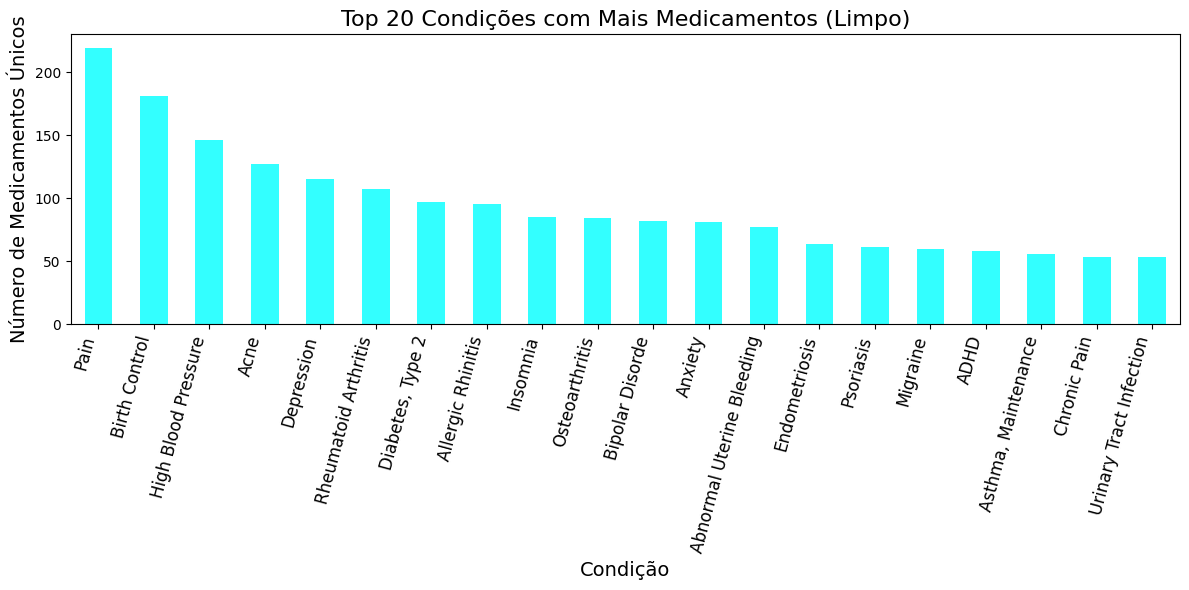

In [ ]:
# Top 20 condições após limpeza
conditions_gp_top_20 = data_cleaned.groupby('condition')['drugName'].nunique().sort_values(ascending=False).head(20)

# Plotando as 20 principais condições com mais medicamentos
plt.figure(figsize=(12, 6))
conditions_gp_top_20.plot(kind='bar', color='cyan', alpha=0.8)
plt.title('Top 20 Condições com Mais Medicamentos (Limpo)', fontsize=16)
plt.xlabel('Condição', fontsize=14)
plt.ylabel('Número de Medicamentos Únicos', fontsize=14)
plt.xticks(rotation=75, fontsize=12, ha='right')
plt.tight_layout()
plt.show()


Top 10 condições com maior média de rating:
condition
Multiple Endocrine Adenomas                          10.0
Hypopituitarism                                      10.0
Cholera                                              10.0
Portal Hypertension                                  10.0
Cerebrovascular Insufficiency                        10.0
Pityriasis rubra pilaris                             10.0
Hodgkin's Lymphoma                                   10.0
Campylobacter Gastroenteritis                        10.0
Testicular Cance                                     10.0
Hyperparathyroidism Secondary to Renal Impairment    10.0
Name: rating, dtype: float64

Bottom 10 condições com menor média de rating:
condition
CNS Magnetic Resonance Imaging                  1.0
Thyroid Suppression Test                        1.0
Hepatic Tum                                     1.0
Hepatitis B Prevention                          1.0
Meningococcal Meningitis Prophylaxis            1.0
Acute Otitis Extern

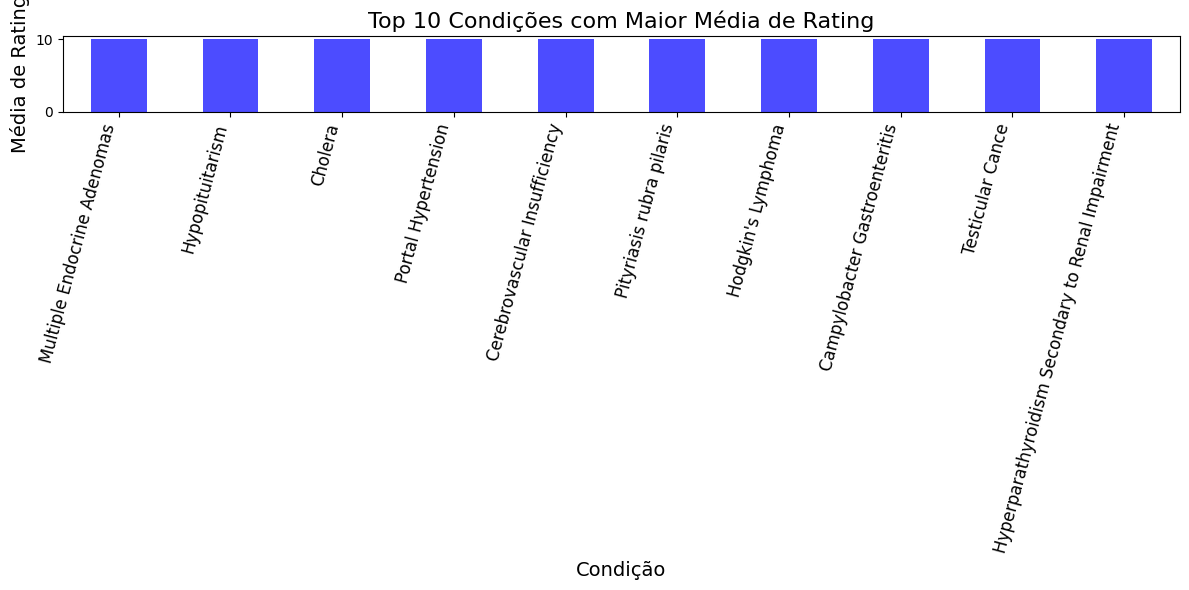

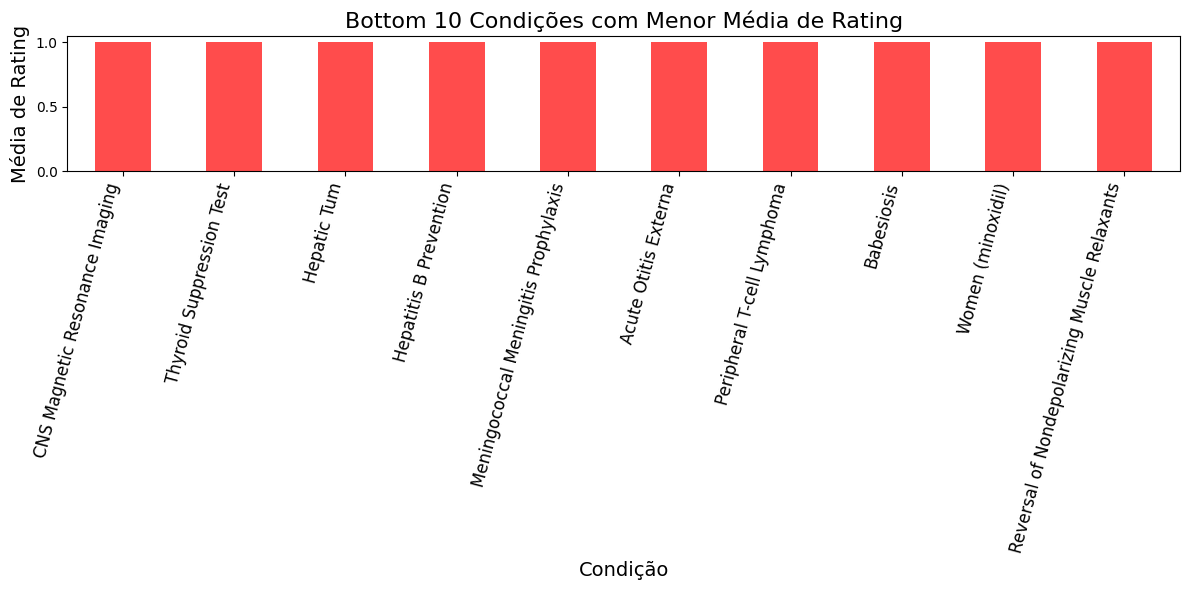

In [ ]:
# Calcular a média de ratings por condição
rating_by_condition = data_cleaned.groupby('condition')['rating'].mean().sort_values(ascending=False)

# Top 10 condições com maior média de rating
print("Top 10 condições com maior média de rating:")
print(rating_by_condition.head(10))

# Bottom 10 condições com menor média de rating
print("\nBottom 10 condições com menor média de rating:")
print(rating_by_condition.tail(10))

# Gráfico para as top 10 condições
plt.figure(figsize=(12, 6))
rating_by_condition.head(10).plot(kind='bar', color='blue', alpha=0.7)
plt.title('Top 10 Condições com Maior Média de Rating', fontsize=16)
plt.xlabel('Condição', fontsize=14)
plt.ylabel('Média de Rating', fontsize=14)
plt.xticks(rotation=75, fontsize=12, ha='right')
plt.tight_layout()
plt.show()
print()

# Gráfico para as bottom 10 condições
plt.figure(figsize=(12, 6))
rating_by_condition.tail(10).plot(kind='bar', color='red', alpha=0.7)
plt.title('Bottom 10 Condições com Menor Média de Rating', fontsize=16)
plt.xlabel('Condição', fontsize=14)
plt.ylabel('Média de Rating', fontsize=14)
plt.xticks(rotation=75, fontsize=12, ha='right')
plt.tight_layout()
plt.show()


Top 10 medicamentos com rating 10:
drugName
Levonorgestrel                       1890
Phentermine                          1069
Etonogestrel                          870
Varenicline                           664
Ethinyl estradiol / norethindrone     616
Escitalopram                          596
Clonazepam                            586
Alprazolam                            559
Sertraline                            550
Plan B                                524
Name: count, dtype: int64

Top 10 medicamentos com rating 1:
drugName
Miconazole                            768
Ethinyl estradiol / norethindrone     746
Etonogestrel                          713
Levonorgestrel                        515
Nexplanon                             499
Ethinyl estradiol / norgestimate      478
Medroxyprogesterone                   450
Depo-Provera                          411
Tioconazole                           410
Ethinyl estradiol / levonorgestrel    399
Name: count, dtype: int64


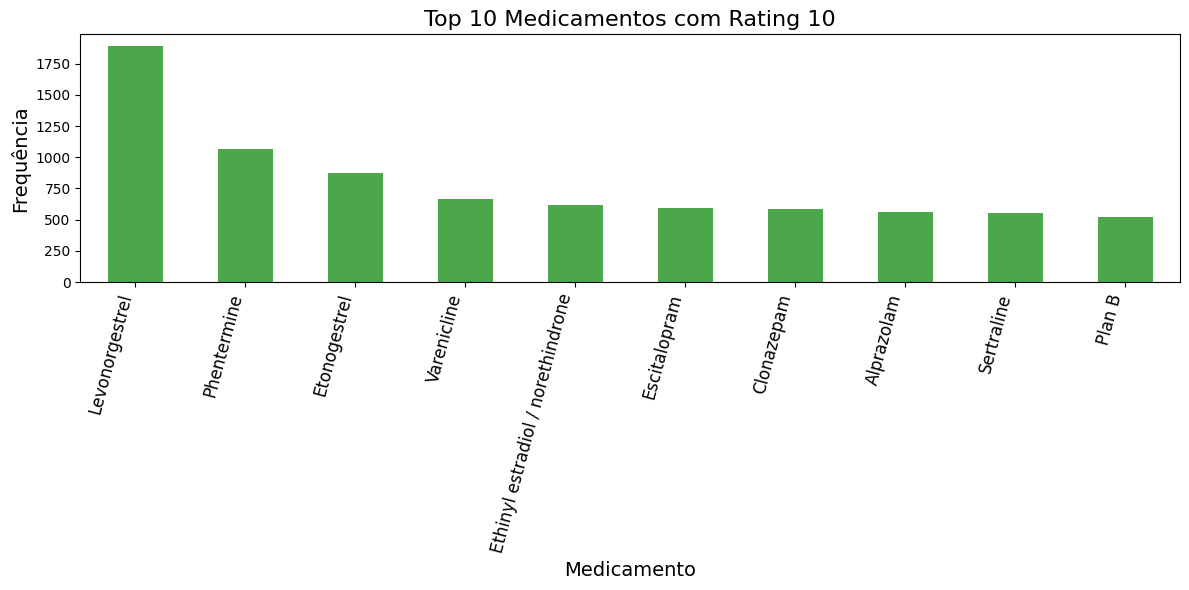

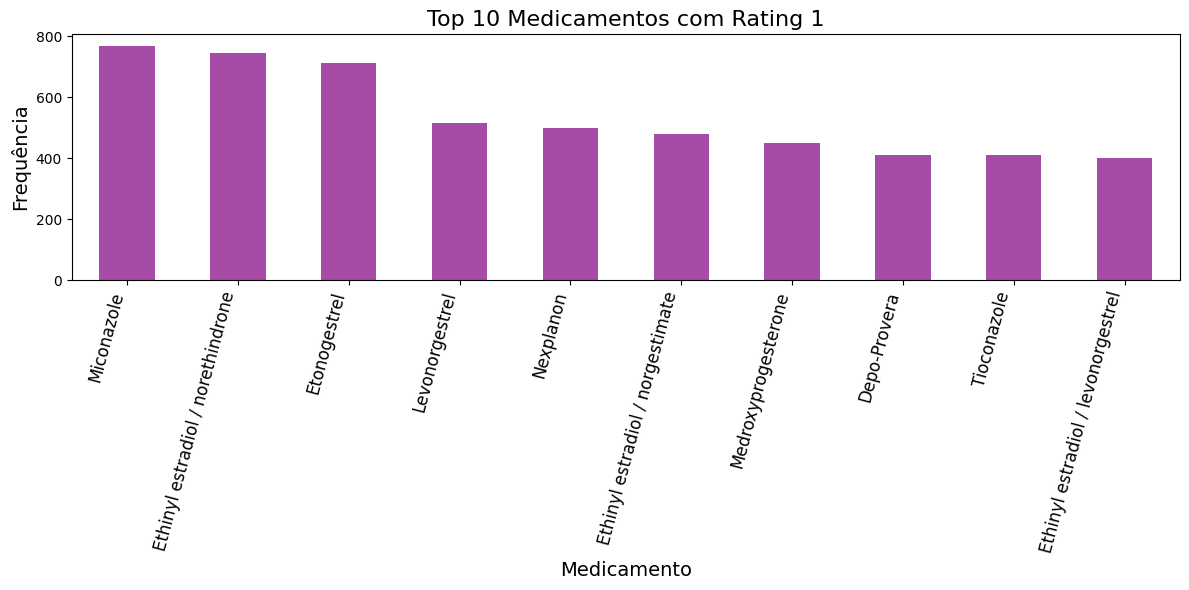

In [ ]:
# Número de medicamentos com rating 10
high_rating_drugs = data_cleaned[data_cleaned['rating'] == 10]['drugName'].value_counts().head(10)
print("Top 10 medicamentos com rating 10:")
print(high_rating_drugs)

# Número de medicamentos com rating 1
low_rating_drugs = data_cleaned[data_cleaned['rating'] == 1]['drugName'].value_counts().head(10)
print("\nTop 10 medicamentos com rating 1:")
print(low_rating_drugs)

# Plotar os resultados
# Medicamentos com rating 10
plt.figure(figsize=(12, 6))
high_rating_drugs.plot(kind='bar', color='green', alpha=0.7)
plt.title('Top 10 Medicamentos com Rating 10', fontsize=16)
plt.xlabel('Medicamento', fontsize=14)
plt.ylabel('Frequência', fontsize=14)
plt.xticks(rotation=75, fontsize=12, ha='right')
plt.tight_layout()
plt.show()

print()
# Medicamentos com rating 1
plt.figure(figsize=(12, 6))
low_rating_drugs.plot(kind='bar', color='purple', alpha=0.7)
plt.title('Top 10 Medicamentos com Rating 1', fontsize=16)
plt.xlabel('Medicamento', fontsize=14)
plt.ylabel('Frequência', fontsize=14)
plt.xticks(rotation=75, fontsize=12, ha='right')
plt.tight_layout()
plt.show()


<ipython-input-15-2a928dbaa2f4>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data_cleaned['date'] = pd.to_datetime(data_cleaned['date'])


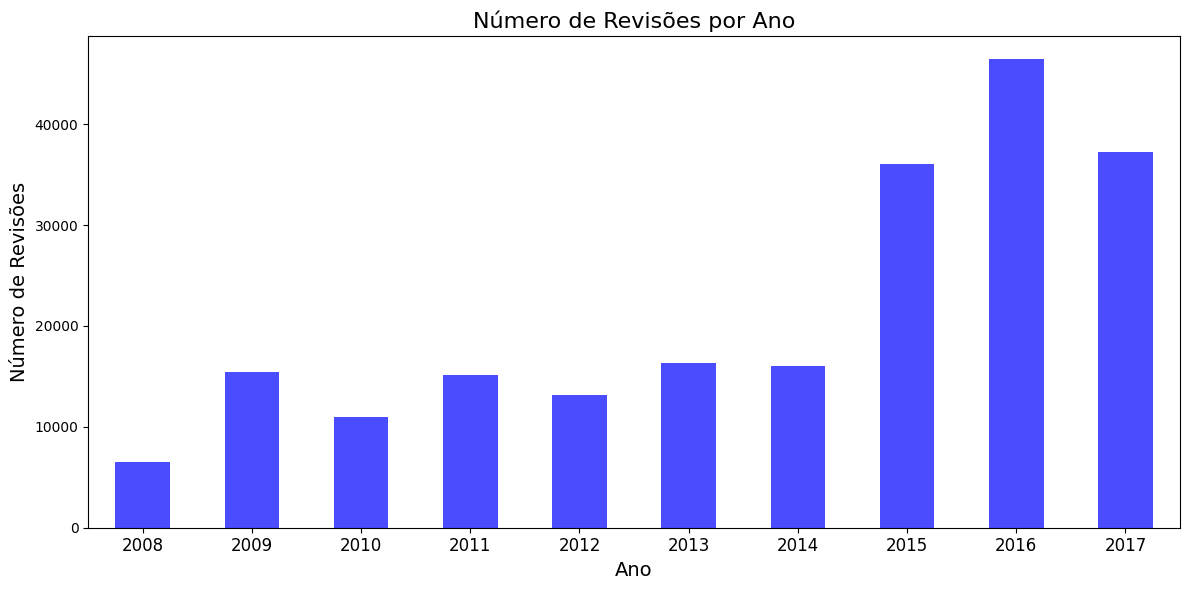

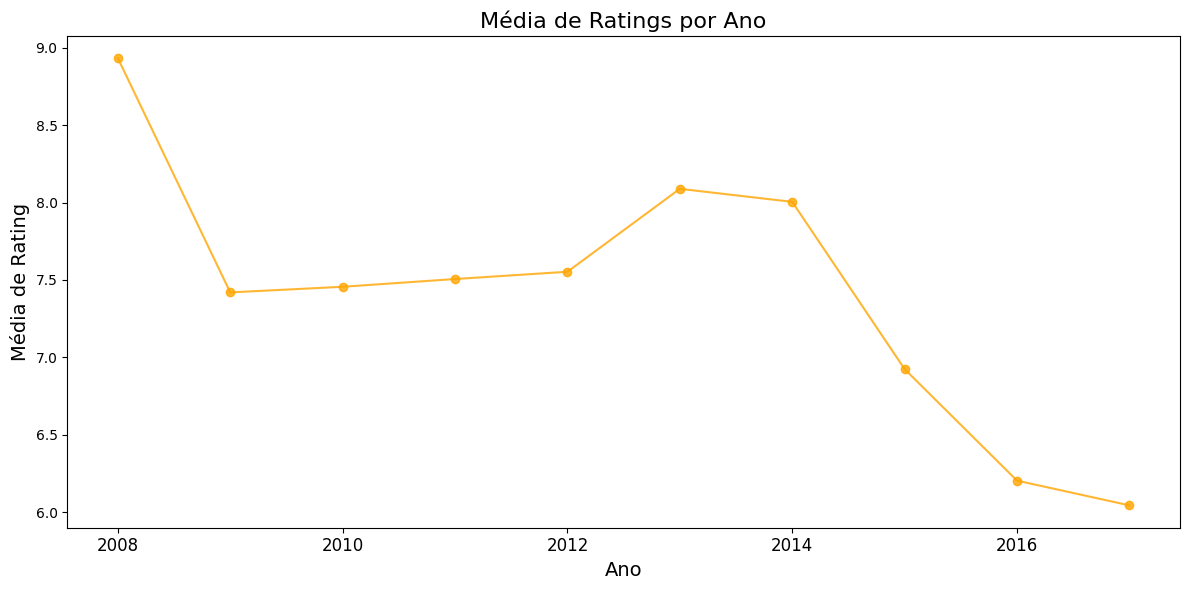

In [ ]:
# Converter a coluna 'date' para o formato datetime
data_cleaned['date'] = pd.to_datetime(data_cleaned['date'])

# Calcular o número de revisões por ano
reviews_per_year = data_cleaned['date'].dt.year.value_counts().sort_index()

# Média de ratings por ano
avg_rating_per_year = data_cleaned.groupby(data_cleaned['date'].dt.year)['rating'].mean()

# Gráfico: Revisões por ano
plt.figure(figsize=(12, 6))
reviews_per_year.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Número de Revisões por Ano', fontsize=16)
plt.xlabel('Ano', fontsize=14)
plt.ylabel('Número de Revisões', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.tight_layout()
plt.show()
print()

# Gráfico: Média de Ratings por Ano
plt.figure(figsize=(12, 6))
avg_rating_per_year.plot(kind='line', marker='o', color='orange', alpha=0.8)
plt.title('Média de Ratings por Ano', fontsize=16)
plt.xlabel('Ano', fontsize=14)
plt.ylabel('Média de Rating', fontsize=14)
plt.xticks(fontsize=12)
plt.tight_layout()
plt.show()


Condições associadas ao Levonorgestrel:
condition
Birth Control                2884
Emergency Contraception      1651
Abnormal Uterine Bleeding     355
Name: count, dtype: int64


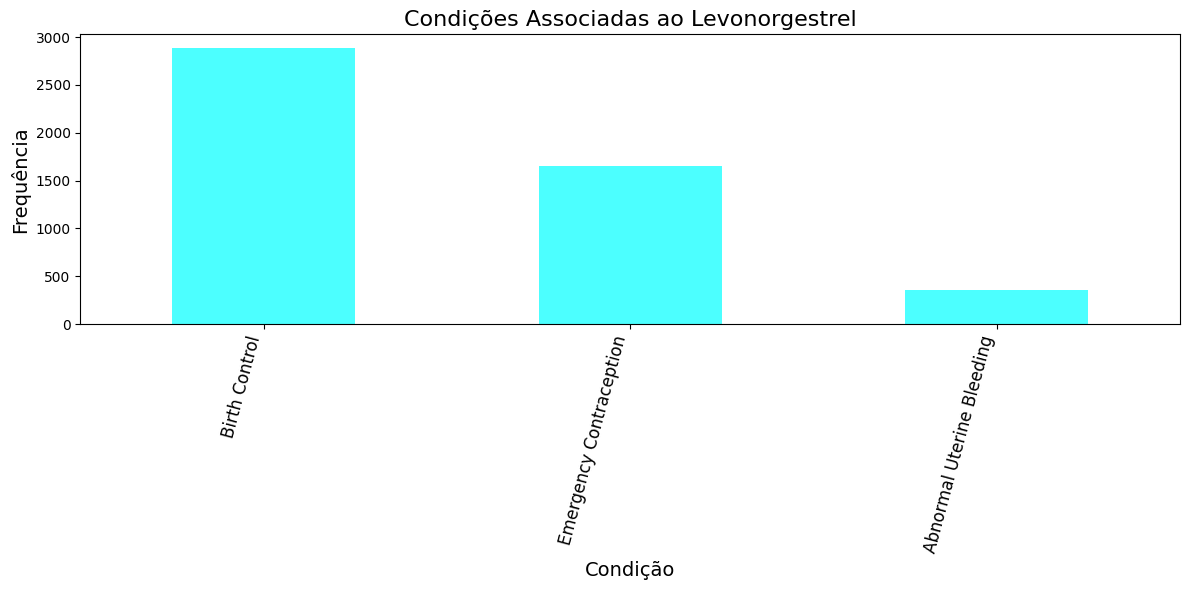

In [ ]:
# Medicamentos associados a Levonorgestrel
levonorgestrel_conditions = data_cleaned[data_cleaned['drugName'] == 'Levonorgestrel']['condition'].value_counts()
print("Condições associadas ao Levonorgestrel:")
print(levonorgestrel_conditions)

# Gráfico de condições associadas
plt.figure(figsize=(12, 6))
levonorgestrel_conditions.plot(kind='bar', color='cyan', alpha=0.7)
plt.title('Condições Associadas ao Levonorgestrel', fontsize=16)
plt.xlabel('Condição', fontsize=14)
plt.ylabel('Frequência', fontsize=14)
plt.xticks(rotation=75, fontsize=12, ha='right')
plt.tight_layout()
plt.show()


# **Pré-Processamento de Dados**

## **Por que realizar o pré-processamento?**

O pré-processamento de dados é uma etapa crucial no desenvolvimento de modelos de Machine Learning. Um dataset mal estruturado, com valores ausentes ou informações irrelevantes, pode gerar modelos imprecisos e ineficientes. O pré-processamento nos ajuda a transformar os dados brutos em um formato limpo e padronizado, adequado para análises e modelos preditivos.

Como diz o ditado, "Garbage In, Garbage Out" (Entradas de baixa qualidade resultam em saídas de baixa qualidade). Portanto, nosso objetivo é eliminar ruídos e preparar o dataset para obter resultados confiáveis.

---

## **Passos do Pré-Processamento**

1. **Remoção de valores ausentes**:
   - Identificamos que apenas a coluna `condition` possui valores ausentes (~0,5% dos dados). Essas linhas serão removidas.

2. **Pré-processamento do texto na coluna `review`**:
   - As avaliações dos pacientes são a base do modelo, mas precisam ser processadas antes de serem usadas:
     - **Remoção de HTML**: Usaremos a biblioteca `BeautifulSoup` para remover tags HTML remanescentes.
     - **Remoção de caracteres especiais e símbolos**: Para focar apenas nas palavras.
     - **Transformação para minúsculas**: Padronizar o texto.
     - **Remoção de stopwords**: Palavras como "a", "o", "é" serão removidas para reduzir ruído.
     - **Tokenização**: Dividir as frases em palavras individuais.
     - **Stemming**: Reduzir palavras à sua forma raiz, como "running" → "run".

3. **Criação da variável-alvo `sentiment`**:
   - Basearemos o sentimento nas classificações (`rating`):
     - `rating > 5`: Sentimento **positivo** (1).
     - `rating <= 5`: Sentimento **negativo** (0).

---

## **Prós e Contras da Abordagem**

### **Pontos Positivos**:
- Limpeza e padronização do texto para facilitar a modelagem.
- Redução de ruído com técnicas como remoção de HTML, stopwords e stemming.
- Simplicidade no mapeamento de `rating` para uma variável-alvo binária.

### **Pontos Negativos**:
- Perda de nuances em ratings intermediários.
- Técnicas como stemming e remoção de stopwords podem impactar negativamente a semântica do texto.
- Modelagem simplificada, focando apenas na coluna `review`, ignorando outras informações potencialmente úteis.

---

Com o dataset processado, poderemos avançar para a construção do modelo preditivo.


In [ ]:
# Verificar valores ausentes novamente
print("Valores ausentes antes da limpeza:")
print(data_cleaned.isnull().sum())

# Remover valores ausentes
data_cleaned.dropna(subset=['condition'], inplace=True)

# Verificar novamente
print("\nValores ausentes após a limpeza:")
print(data_cleaned.isnull().sum())


Valores ausentes antes da limpeza:
drugName          0
condition      1194
review            0
rating            0
date              0
usefulCount       0
dtype: int64

Valores ausentes após a limpeza:
drugName       0
condition      0
review         0
rating         0
date           0
usefulCount    0
dtype: int64


In [ ]:
from bs4 import BeautifulSoup
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

# Download de stopwords do NLTK
nltk.download('stopwords')

# Configurar o stemmer e as stopwords
stops = set(stopwords.words('english'))
stemmer = SnowballStemmer('english')

# Função de pré-processamento
def review_to_words(raw_review):
    # 1. Remover HTML
    review_text = BeautifulSoup(raw_review, 'html.parser').get_text()
    # 2. Manter apenas letras
    letters_only = re.sub('[^a-zA-Z]', ' ', review_text)
    # 3. Converter para minúsculas e tokenizar
    words = letters_only.lower().split()
    # 4. Remover stopwords
    meaningful_words = [w for w in words if not w in stops]
    # 5. Aplicar stemming
    stemming_words = [stemmer.stem(w) for w in meaningful_words]
    # 6. Reunir palavras em uma string
    return ' '.join(stemming_words)

# Aplicar a função na coluna 'review'
print("\nPré-processando as avaliações...")
data_cleaned['review'] = data_cleaned['review'].apply(review_to_words)

# Verificar as 3 primeiras avaliações processadas
print("\nPrimeiras avaliações processadas:")
for i in data_cleaned['review'].head(3):
    print(i, '\n')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.



Pré-processando as avaliações...


<ipython-input-18-c8f617f809ec>:17: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  review_text = BeautifulSoup(raw_review, 'html.parser').get_text()



Primeiras avaliações processadas:
side effect take combin bystol mg fish oil 

son halfway fourth week intuniv becam concern began last week start take highest dose two day could hard get bed cranki slept near hour drive home school vacat unusu call doctor monday morn said stick day see school get morn last two day problem free much agreeabl ever less emot good thing less cranki rememb thing overal behavior better tri mani differ medic far effect 

use take anoth oral contracept pill cycl happi light period max day side effect contain hormon gestoden avail us switch lybrel ingredi similar pill end start lybrel immedi first day period instruct said period last two week take second pack two week third pack thing got even wors third period last two week end third week still daili brown discharg posit side side effect idea period free tempt ala 



In [ ]:
# Criar a coluna 'sentiment' com base no rating
data_cleaned['sentiment'] = data_cleaned['rating'].apply(lambda x: 1 if x > 5 else 0)

# Verificar a distribuição da nova variável
print("\nDistribuição de 'sentiment':")
print(data_cleaned['sentiment'].value_counts(normalize=True) * 100)



Distribuição de 'sentiment':
sentiment
1    70.09797
0    29.90203
Name: proportion, dtype: float64


In [ ]:
# Salvar o dataset pré-processado
data_cleaned.to_csv('drug_reviews_preprocessed.csv', index=False)
print("\nDataset pré-processado salvo como 'drug_reviews_preprocessed.csv'")



Dataset pré-processado salvo como 'drug_reviews_preprocessed.csv'


# **Construção do Modelo**

## **Por que transformar texto em números?**
Os modelos de Machine Learning não conseguem processar diretamente dados textuais. Precisamos converter as avaliações em representações numéricas. Uma abordagem comum e eficaz para isso é o **TF-IDF Vectorizer**.

---

## **O que é TF-IDF?**
TF-IDF significa **Term Frequency - Inverse Document Frequency**. Ele combina duas métricas principais:

### **Term Frequency (TF - Frequência do Termo):**
Mede a frequência de uma palavra em um documento:

- **TF (Frequência do Termo)**:
  Mede a frequência de uma palavra em um documento.
  TF = (Número de ocorrências de uma palavra no documento) / (Número total de palavras no documento)


- **IDF (Frequência Inversa do Documento)**:
Mede a raridade de uma palavra em um conjunto de documentos.
IDF = log(Número de documentos / Número de documentos contendo a palavra)

O TF-IDF calcula o peso de uma palavra combinando as duas métricas:

TF-IDF = TF * IDF


---

## **Etapas para Construção do Modelo**
1. **Converter texto em números**:
   Usaremos o **TfidfVectorizer** para transformar as avaliações (`review`) em um corpus numérico.
2. **Dividir os dados**:
   Dividiremos os dados em conjuntos de treinamento (70%) e teste (30%).
3. **Treinar o modelo**:
   Treinaremos dois modelos:
   - **Naive Bayes Multinomial**
   - **Random Forest Classifier**
   - **Logistic Regression**
   - **SVM (Support Vector Machine)**
4. **Avaliar o modelo**:
   Usaremos métricas como acurácia e matriz de confusão para avaliar o desempenho.

---

## **Modelos e Resultados**
1. **Multinomial Naive Bayes**:
   - Acurácia: ~75.8%
   - Modelo rápido, adequado para texto, mas pode ter dificuldade com dados complexos.
2. **Random Forest Classifier**:
   - Acurácia: ~89.5%
   - Melhor desempenho, mas mais lento e com maior necessidade de recursos.
3. **Logistic Regression**:
   - Acurácia: ~83.1%
   - Modelo balanceado, com bom desempenho em dados lineares e complexidade moderada.
4. **SVM (Support Vector Machine)**:
   - Acurácia: ~53.9%
   - Modelo limitado por tempo de execução e custo computacional, com desempenho inferior neste caso.
   - Sem um limite explícito de iterações, o modelo pode tentar otimizar indefinidamente, especialmente em problemas difíceis de separar linearmente.
   - Definir max_iter=200 força o treinamento a parar após 200 iterações, mesmo que a convergência ideal não seja alcançada.
   

---

Com os modelos treinados e avaliados, podemos comparar os resultados para escolher a melhor abordagem.




In [ ]:
# Importar bibliotecas necessárias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Carregar os dados (substitua pelo caminho correto do seu dataset)
# Aqui assumimos que o dataset é um CSV com colunas 'review' (texto) e 'sentiment' (rótulos)
path = '/content/drug_reviews_preprocessed.csv'
data = pd.read_csv(path)

# Visualizar os primeiros registros
data.head(10)


,drugName,condition,review,rating,date,usefulCount,sentiment
0,Valsartan,Left Ventricular Dysfunction,side effect take combin bystol mg fish oil,9,2012-05-20,27,1
1,Guanfacine,ADHD,son halfway fourth week intuniv becam concern ...,8,2010-04-27,192,1
2,Lybrel,Birth Control,use take anoth oral contracept pill cycl happi...,5,2009-12-14,17,0
3,Ortho Evra,Birth Control,first time use form birth control glad went pa...,8,2015-11-03,10,1
4,Buprenorphine / naloxone,Opiate Dependence,suboxon complet turn life around feel healthie...,9,2016-11-27,37,1
5,Cialis,Benign Prostatic Hyperplasia,nd day mg start work rock hard erect howev exp...,2,2015-11-28,43,0
6,Levonorgestrel,Emergency Contraception,pull cum bit took plan b hour later took pregn...,1,2017-03-07,5,0
7,Aripiprazole,Bipolar Disorde,abilifi chang life hope zoloft clonidin first ...,10,2015-03-14,32,1
8,Keppra,Epilepsy,noth problem keppera constant shake arm leg pi...,1,2016-08-09,11,0
9,Ethinyl estradiol / levonorgestrel,Birth Control,pill mani year doctor chang rx chateal effect ...,8,2016-12-08,1,1


In [ ]:
# Verificar as colunas disponíveis no dataset
print("Colunas do dataset:", data.columns)

# Verificar se há valores ausentes
print("\nValores ausentes por coluna:")
print(data.isnull().sum())

# Exibir algumas amostras do dataset para verificar inconsistências
print("\nAmostras do dataset:")
print(data.head())


Colunas do dataset: Index(['drugName', 'condition', 'review', 'rating', 'date', 'usefulCount',
       'sentiment'],
      dtype='object')

Valores ausentes por coluna:
drugName       0
condition      0
review         8
rating         0
date           0
usefulCount    0
sentiment      0
dtype: int64

Amostras do dataset:
                   drugName                     condition  \
0                 Valsartan  Left Ventricular Dysfunction   
1                Guanfacine                          ADHD   
2                    Lybrel                 Birth Control   
3                Ortho Evra                 Birth Control   
4  Buprenorphine / naloxone             Opiate Dependence   

                                              review  rating        date  \
0         side effect take combin bystol mg fish oil       9  2012-05-20   
1  son halfway fourth week intuniv becam concern ...       8  2010-04-27   
2  use take anoth oral contracept pill cycl happi...       5  2009-12-14   
3  firs

In [ ]:
# Remover valores ausentes na coluna 'review'
data = data.dropna(subset=['review'])

# Garantir que a coluna 'review' é string
data['review'] = data['review'].astype(str)

# Separar texto (X) e rótulos (y)
X = data['review']
y = data['sentiment']

# Dividir o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Transformar texto em representações numéricas usando TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Limitando a 5000 características
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print()
# Exibir as dimensões dos conjuntos de dados transformados
print("Dimensões do conjunto de treinamento:", X_train_tfidf.shape)
print("Dimensões do conjunto de teste:", X_test_tfidf.shape)


<ipython-input-23-dfc45b0b0124>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['review'] = data['review'].astype(str)



Dimensões do conjunto de treinamento: (148468, 5000)
Dimensões do conjunto de teste: (63630, 5000)


In [ ]:
# Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
y_pred_nb = nb_model.predict(X_test_tfidf)

# Random Forest com número reduzido de estimadores
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tfidf, y_train)
y_pred_rf = rf_model.predict(X_test_tfidf)

# Logistic Regression com menos iterações
log_reg = LogisticRegression(max_iter=500, random_state=42)
log_reg.fit(X_train_tfidf, y_train)
y_pred_lr = log_reg.predict(X_test_tfidf)

# SVM com kernel linear
svm_model = SVC(kernel='linear', probability=True, max_iter=200, random_state=42)
svm_model.fit(X_train_tfidf, y_train)
y_pred_svm = svm_model.predict(X_test_tfidf)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Acurácia Naive Bayes: 0.7777306302058777

Relatório de Classificação - Naive Bayes:
               precision    recall  f1-score   support

           0       0.82      0.32      0.46     18946
           1       0.77      0.97      0.86     44684

    accuracy                           0.78     63630
   macro avg       0.80      0.65      0.66     63630
weighted avg       0.79      0.78      0.74     63630



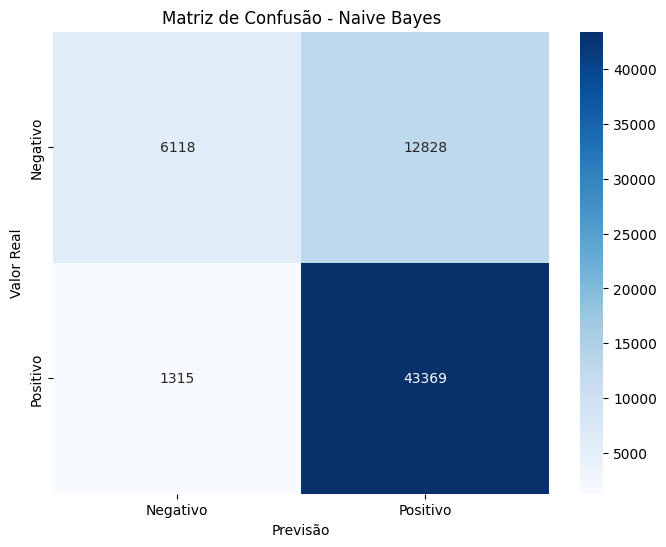


Acurácia Random Forest: 0.9062234794908062

Relatório de Classificação - Random Forest:
               precision    recall  f1-score   support

           0       0.95      0.72      0.82     18946
           1       0.89      0.98      0.94     44684

    accuracy                           0.91     63630
   macro avg       0.92      0.85      0.88     63630
weighted avg       0.91      0.91      0.90     63630



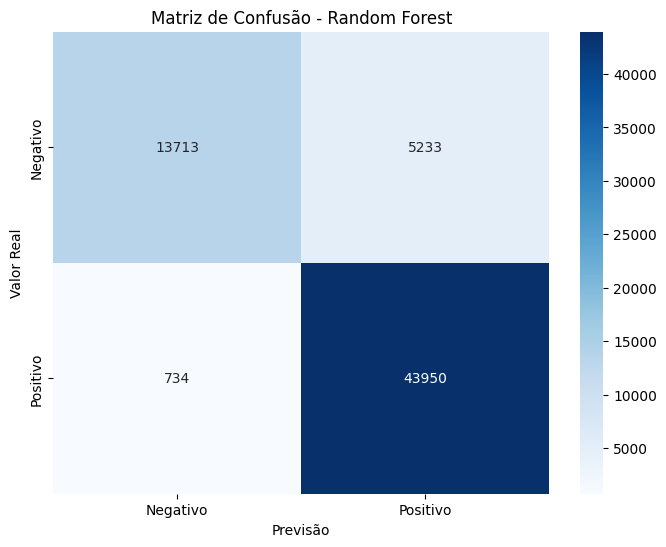


Acurácia Logistic Regression: 0.8311016815967311

Relatório de Classificação - Logistic Regression:
               precision    recall  f1-score   support

           0       0.77      0.62      0.69     18946
           1       0.85      0.92      0.88     44684

    accuracy                           0.83     63630
   macro avg       0.81      0.77      0.79     63630
weighted avg       0.83      0.83      0.83     63630



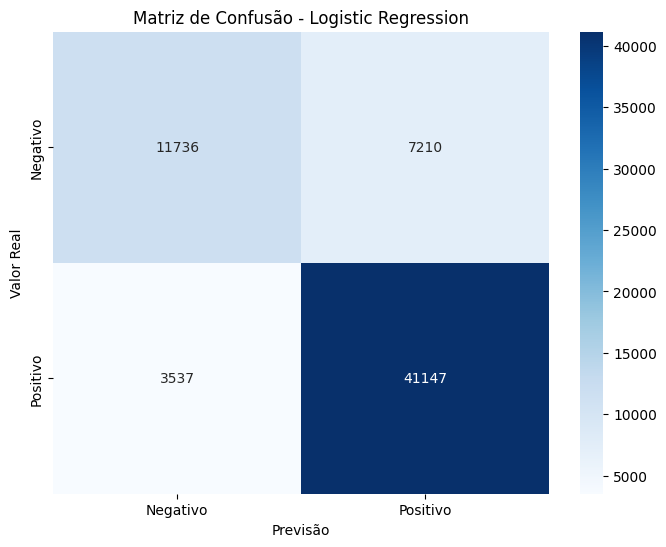


Acurácia SVM: 0.5386138613861386

Relatório de Classificação - SVM:
               precision    recall  f1-score   support

           0       0.32      0.50      0.39     18946
           1       0.72      0.55      0.63     44684

    accuracy                           0.54     63630
   macro avg       0.52      0.53      0.51     63630
weighted avg       0.60      0.54      0.56     63630



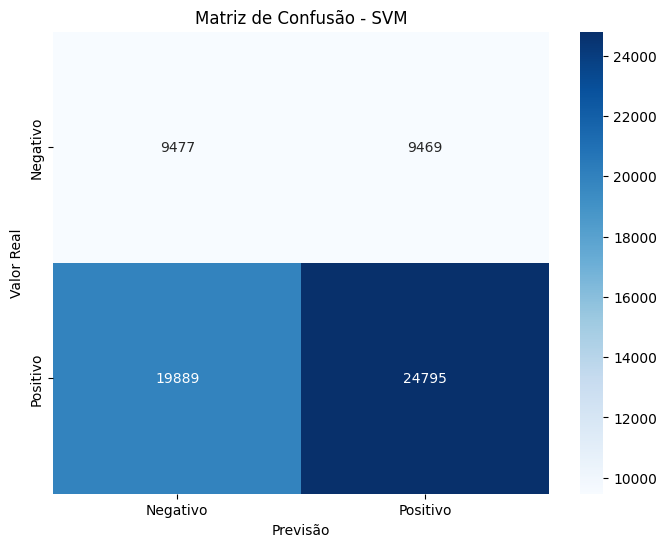

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Função para plotar matriz de confusão
def plot_confusion_matrix(cm, model_name, labels=['Negativo', 'Positivo']):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.title(f"Matriz de Confusão - {model_name}")
    plt.xlabel("Previsão")
    plt.ylabel("Valor Real")
    plt.show()

# Avaliar Naive Bayes
print("Acurácia Naive Bayes:", accuracy_score(y_test, y_pred_nb))
print("\nRelatório de Classificação - Naive Bayes:\n", classification_report(y_test, y_pred_nb))
cm_nb = confusion_matrix(y_test, y_pred_nb)
plot_confusion_matrix(cm_nb, "Naive Bayes")

# Avaliar Random Forest
print("\nAcurácia Random Forest:", accuracy_score(y_test, y_pred_rf))
print("\nRelatório de Classificação - Random Forest:\n", classification_report(y_test, y_pred_rf))
cm_rf = confusion_matrix(y_test, y_pred_rf)
plot_confusion_matrix(cm_rf, "Random Forest")

# Avaliar Logistic Regression
print("\nAcurácia Logistic Regression:", accuracy_score(y_test, y_pred_lr))
print("\nRelatório de Classificação - Logistic Regression:\n", classification_report(y_test, y_pred_lr))
cm_lr = confusion_matrix(y_test, y_pred_lr)
plot_confusion_matrix(cm_lr, "Logistic Regression")

# Avaliar SVM
print("\nAcurácia SVM:", accuracy_score(y_test, y_pred_svm))
print("\nRelatório de Classificação - SVM:\n", classification_report(y_test, y_pred_svm))
cm_svm = confusion_matrix(y_test, y_pred_svm)
plot_confusion_matrix(cm_svm, "SVM")


In [ ]:
from sklearn.model_selection import cross_val_score

# Validação cruzada para cada modelo com CV=3 para rapidez
cv_nb = cross_val_score(nb_model, X_train_tfidf, y_train, cv=3, scoring='accuracy')
cv_rf = cross_val_score(rf_model, X_train_tfidf, y_train, cv=3, scoring='accuracy')
cv_lr = cross_val_score(log_reg, X_train_tfidf, y_train, cv=3, scoring='accuracy')
cv_svm = cross_val_score(svm_model, X_train_tfidf, y_train, cv=3, scoring='accuracy')

print("\nValidação Cruzada (Acurácia Média):")
print("Naive Bayes:", cv_nb.mean())
print("Random Forest:", cv_rf.mean())
print("Logistic Regression:", cv_lr.mean())
print("SVM:", cv_svm.mean())


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(



Validação Cruzada (Acurácia Média):
Naive Bayes: 0.7741870361242637
Random Forest: 0.8651291846232856
Logistic Regression: 0.8250734254604044
SVM: 0.59603410967313


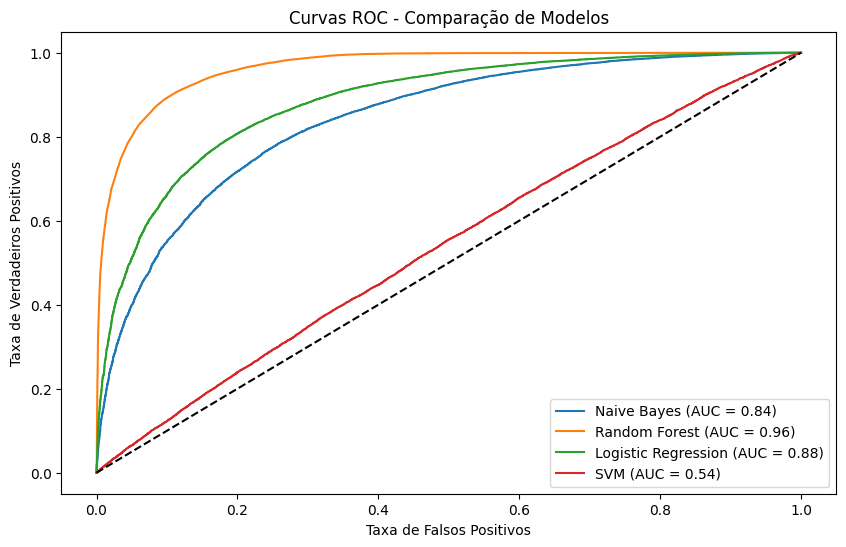

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Naive Bayes - Probabilidades
y_prob_nb = nb_model.predict_proba(X_test_tfidf)[:, 1]
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_prob_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)

# Random Forest - Probabilidades
y_prob_rf = rf_model.predict_proba(X_test_tfidf)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Logistic Regression - Probabilidades
y_prob_lr = log_reg.predict_proba(X_test_tfidf)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

# SVM - Probabilidades
y_prob_svm = svm_model.predict_proba(X_test_tfidf)[:, 1]
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Plotar as Curvas ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr_nb, tpr_nb, label=f'Naive Bayes (AUC = {roc_auc_nb:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {roc_auc_svm:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Linha de referência
plt.title("Curvas ROC - Comparação de Modelos")
plt.xlabel("Taxa de Falsos Positivos")
plt.ylabel("Taxa de Verdadeiros Positivos")
plt.legend()
plt.show()
